# System Modeling

Before jumping into control design, it's essential to understand the physics of the system, including heat transfer mechanisms: conduction, radiation, and (to a lesser extent in space) convection.

## Reference materials

* Alizadeh, Esmaeil. "A Guide to Non-Minimum Phase Systems." *Towards Data Science.* https://ealizadeh.com/blog/non-minimum-phase-systems/. Accessed 6 Decewmber 2020.

### Heat Transfer Mechanisms Explained

- **Conduction**: Heat flow through direct physical contact, significant in our system due to connections between the heater, battery, and spacecraft structure.
- **Radiation**: Transfer of heat through electromagnetic waves, relevant due to exposure to the sun and deep space.
- **Convection**: Less relevant in the vacuum of space, but a factor to consider during earth-based testing.

<table>
    <tr>
    <td>
        <img src="./pics/tclab_conductive.png" alt="tclab_conductive" style="width: 450px;"/>    
    </td>
    </tr>
</table> 

## First block diagram - how accurate it is?


<table>
    <tr>
    <td>
        <img src="./pics/tclab_block_diagram-1.png" alt="tclab_block_diagram-1" style="width: 450px;"/>    
    </td>
    </tr>
</table> 


### Detailed Explanation of Heat Transfer Mechanisms

#### **Conduction**

Conduction is the transfer of heat through direct physical contact. In a spacecraft, this occurs when molecules or atoms in a high-temperature region vibrate intensely and pass on their energy to neighboring particles in a lower temperature area. 

- **Importance in Spacecraft**: In our satellite thermal control system, conduction is crucial as it enables the transfer of heat from the heater to the battery and then to the spacecraft's structure. This mechanism is integral in maintaining the temperatures within operational limits.
  
- **Example**: Imagine holding one end of a metal rod over a flame. Gradually, heat travels along the rod, making the distant end warm. This is similar to how heat conducts from the heater through the battery in our system.

#### **Radiation**

Radiation refers to the transfer of heat in the form of electromagnetic waves. It doesn't require a medium to travel through, making it a primary mode of heat transfer in space.

- **Role in Spacecraft**: In the context of a spacecraft, radiation is significant for two reasons. Firstly, it accounts for the heat gain from the Sun, as solar radiation directly impacts parts of the satellite. Secondly, it is the method by which the spacecraft loses heat to the coldness of deep space.
  
- **Example**: The warmth you feel when standing in sunlight is due to radiant heat transfer. The Sun's heat travels through the vacuum of space and warms you via radiation.

#### **Convection**

Convection is the transfer of heat by the physical movement of a fluid (such as air or liquid). It involves the circulation or movement of particles within the fluid, where hot particles move to cooler areas and vice versa.

- **Relevance in Spacecraft Testing**: While convection is not a heat transfer mechanism in the vacuum of space, it becomes significant during Earth-based testing of spacecraft systems. Here, the presence of air around the spacecraft allows for convective heat transfer, which can affect the performance and testing outcomes of thermal control systems.
  
- **Example**: When you heat water in a pot, the water at the bottom, nearest to the heat source, becomes hot and rises, while cooler water moves down to replace it, creating a circular motion. This process of heat transfer through the movement of fluid is convection.

Understanding these heat transfer mechanisms is important for effectively managing the thermal environment of a spacecraft. It ensures that the onboard systems operate within their temperature tolerances, thereby enhancing the satellite's overall performance and longevity.

----

# System Identification

### Importance of Accurate Modeling

Accurate system modeling is crucial for effective controller design. It involves understanding the dynamics of the system and its response to inputs, which is particularly important for PID controller tuning.

1. **Step Response Analysis**: Conducting a step response experiment to gather data for system identification.
2. **Fitting a Transfer Function**: Using the gathered data to fit a first-order plus dead time (FOPDT) model, which includes gain, time constant, and delay.

### Iterative Design Process

The design process is iterative, involving tweaking and improving the controller based on system response. This approach emphasizes the non-linear and exploratory nature of engineering problem-solving.

## First-Order Dead Time (FOPDT) Modeling

Also called First-Order plus time delay (FOPTD)

- $y(t)$: output
- $u(t)$: input

Model:

$$
\tau_p \frac{dy(t)}{dt} = -y(t) + K_pu(t-\theta_p)
$$

Three parameters: 
- $\tau_p$: time-constant
- $K_p$: gain $\frac{\Delta y}{\Delta u}$ 
- $\theta_p$: dead time (how long it takes the output to start responding to an input) 

The process gain is the change in the output y induced by a unit change in the input u. The process gain is calculated by evaluating the change in $y(t)$ divided by the change in $u(t)$ at steady state initial and final conditions:

$$
K_p = \frac{\Delta y}{\Delta u} = \frac{y_ss_2 - y_ss_1}{u_ss_2 - u_ss_1}
$$


These three parameters adjust the shape of the response between the input and the output.

<table>
    <tr>
    <td>
        <img src="./pics/fopdt-1.png" alt="fopdt-1" style="width: 450px;"/>    
    </td>
    </tr>
</table> 


The Laplace transform of the previous differential equation is:

$$
\tau_p sY(s) = - Y(s) + K_p e^{-\theta_p s}U(s)
$$

hence the transfer function is:

$$
G(s) = \frac{Y(s)}{U(s)} = \frac{K_p e^{-\theta_p s}}{\tau_p s + 1}
$$

The solution to the previous differential equation:

$$
y(t) = \Big(1-e^{-\frac{t-\theta_p}{\tau_p}}\Big)K_p\Delta u \mu(t-\theta_p)
$$

where $\mu(t-\theta_p)$ is the step function with a delay.



Setting $t=\tau_p$ and $\theta_p=0$ we can calculate:

$$
\frac{y(\tau_p)}{Kp\Delta u} = \Big(1-e^{-\frac{\tau_p}{\tau_p}}\Big) = (1-e^{-1}) = 0.632
$$

given that $K_p = \Delta y / \Delta u$ we can write:

$$
\frac{y(\tau_p)}{\Delta y} = \Big(1-e^{-\frac{\tau_p}{\tau_p}}\Big) = (1-e^{-1}) = 0.632
$$

which means:

$$
y(\tau_p) = 0.632\Delta y
$$

We can plot this in python:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

In [ ]:
def step_function(t, theta_p):
    return np.heaviside(t - theta_p, 1)

def y(t, Kp, theta_p, tau_p, Delta_u=1):
    return (1 - np.exp(-(t - theta_p) / tau_p)) * Kp * Delta_u * step_function(t, theta_p)

def plot_response(Kp=1, theta_p=0, tau_p=1):
    t = np.linspace(0, 10, 1000)  # Adjust time range as needed
    Delta_u = 1  # Change as per your setup
    y_vals = y(t, Kp, theta_p, tau_p, Delta_u)
    
    plt.figure(figsize=(10, 6))
    plt.plot(t, y_vals, label=f'$K_p$={Kp}, $\\theta_p$={theta_p}, $\\tau_p$={tau_p}')
    plt.title('System Response')
    plt.xlabel('Time')
    plt.ylabel('$y(t)$')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_response_with_input(Kp=1, theta_p=0, tau_p=1):
    t = np.linspace(0, 10, 1000)  # Adjust time range as needed
    Delta_u = 1  # Change as per your setup
    y_vals = y(t, Kp, theta_p, tau_p, Delta_u)
    input_signal = step_function(t, theta_p) * Delta_u  # Assuming Delta_u is the step height
    
    plt.figure(figsize=(10, 6))
    
    # Plotting the system response
    plt.plot(t, y_vals, label=f'System Response: $K_p$={Kp}, $\\theta_p$={theta_p}, $\\tau_p$={tau_p}')
    # Plotting the input signal
    plt.plot(t, input_signal, '--', label='Input Signal ($\\Delta u$)')
    
    plt.title('System Response and Input Signal')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.show()    
    
    
interactive_plot = interactive(plot_response, Kp=(0.1, 10, 0.1), theta_p=(0, 5, 0.1), tau_p=(0.1, 10, 0.1))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot


interactive(children=(FloatSlider(value=1.0, description='Kp', max=10.0, min=0.1), FloatSlider(value=0.0, desc…

-----

### Graphical Method: FOPDT to Step Test

See also [here](https://apmonitor.com/pdc/index.php/Main/FirstOrderGraphical)

Step test data are convenient for identifying an FOPDT model through a graphical fitting method. Follow the following steps when fitting the parameters $K_p$, $\tau_p$, $\theta_p$ to a step response:


- Find $\Delta y$ from step response.
- Find $\Delta u$ from step response.
- Calculate $K_p = \frac{\Delta y}{\Delta u}=\frac{3.0}{1.0}$ 
- Find $\theta_p$ apparent dead time, from step response: draw the tangent in the output curve, and compare when the tangent crosses the x-axis to when the input started. In our case it seems approximately $2.5s$

- Find $0.632\Delta y$ from step response. In our case: 1.9
- Find $t_{0.632}$ for $y(t_{0.632}) = 0.632\Delta y$ from step response.

- Calculate $\tau_p = t_{0.632} - \theta_p = 6.8 - 4.5 = 2.3 s$. This assumes that the step starts at $t = 0$. If the step happens later, subtract the step time as well.



In [ ]:
import numpy as np
from scipy.integrate import odeint
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt

In [ ]:
def process_model(y, t, system_order, input_value, gain, time_constant):
    """
    Simulate a higher-order process.

    Parameters:
    y            : Current output values of the system.
    t            : Current time.
    system_order : Order of the system.
    input_value  : Current input value to the system.
    gain         : Process gain.
    time_constant: Process time constant.

    Returns:
    dydt : Derivative of the system output.
    """
    dydt = np.zeros(system_order)
    dydt[0] = (-y[0] + gain * input_value) / (time_constant / system_order)
    for i in range(1, system_order):
        dydt[i] = (-y[i] + y[i-1]) / (time_constant / system_order)
    return dydt

def fopdt_model(y, t, input_func, model_gain, model_time_constant, model_delay):
    """
    First-Order Plus Dead-Time (FOPDT) approximation of a process.

    Parameters:
    y                  : Current output value of the model.
    t                  : Current time.
    input_func         : Function to interpolate input values over time.
    model_gain         : Model gain.
    model_time_constant: Model time constant.
    model_delay        : Model delay time.

    Returns:
    dydt : Derivative of the model output.
    """
    # Handle input value with respect to delay
    try:
        if t - model_delay <= 0:
            input_value = input_func(0.0)
        else:
            input_value = input_func(t - model_delay)
    except:
        input_value = 0

    dydt = (-y + model_gain * input_value) / model_time_constant
    return dydt

# Simulation setup
ns = 40  # Number of steps
t = np.linspace(0, 16, ns+1)  # Define time points
delta_t = t[1] - t[0]  # Time step size
u = np.zeros(ns+1)  # Initialize input vector
u[5:] = 1.0  # Set input to 1.0 starting from t=5

# Create a function to interpolate input values over time
uf = interp1d(t, u)

def simulate_process_data():
    """
    Simulate data from a higher-order process for comparison with the FOPDT model.
    
    Returns:
    yp : Simulated process output over time.
    """
    # Process parameters
    n = 10  # Order of the system
    Kp = 3.0  # Gain
    taup = 5.0  # Time constant
    
    yp = np.zeros(ns+1)  # Initialize storage for process outputs
    for i in range(1, ns+1):
        if i == 1:
            yp0 = np.zeros(n)  # Initial condition
        ts = [delta_t * (i-1), delta_t * i]  # Time span for this step
        y = odeint(process_model, yp0, ts, args=(n, u[i], Kp, taup))
        yp0 = y[-1]  # Update initial condition for the next step
        yp[i] = y[1][n-1]  # Store the last output
    return yp

yp = simulate_process_data()

def simulate_fopdt_model(Km, taum, thetam):
    """
    Simulate the FOPDT model based on given parameters.

    Parameters:
    Km     : Model gain.
    taum   : Model time constant.
    thetam : Model delay time.

    Returns:
    ym : Simulated model output over time.
    """
    ym = np.zeros(ns+1)  # Initialize model output storage
    ym[0] = 0  # Initial condition
    for i in range(1, ns+1):
        ts = [delta_t * (i-1), delta_t * i]  # Time span for this step
        y1 = odeint(fopdt_model, ym[i-1], ts, args=(uf, Km, taum, thetam))
        ym[i] = y1[-1][0]  # Corrected to ensure a scalar is assigned to ym[i]
    return ym



In [ ]:
# Update model parameters for simulation
Km = 2.5  # Model gain
taum = 3.0  # Model time constant
thetam = 5.0  # Model delay

# Simulate FOPDT model with the updated parameters
ym = simulate_fopdt_model(Km, taum, thetam)

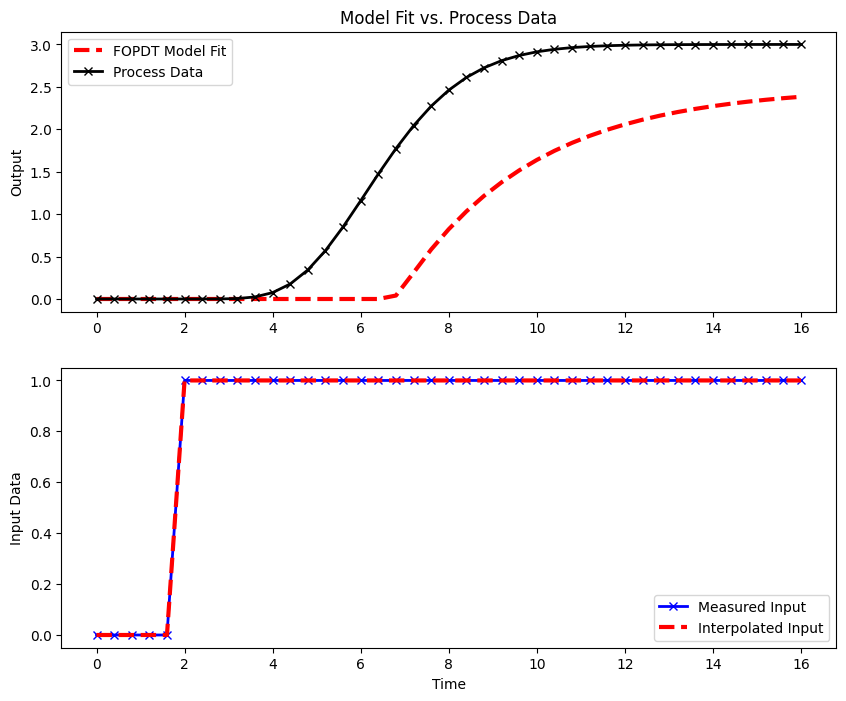

In [ ]:


# Start plotting the results
plt.figure(figsize=(10, 8))  # Create a new figure with a specified size

# Plot the first subplot showing output comparison
plt.subplot(2, 1, 1)  # Create a subplot in a 2x1 grid, position 1
plt.plot(t, ym, 'r--', linewidth=3, label='FOPDT Model Fit')  # Plot the FOPDT model output
plt.plot(t, yp, 'kx-', linewidth=2, label='Process Data')  # Plot the simulated process data
plt.ylabel('Output')  # Label the y-axis
plt.legend(loc='best')  # Show a legend in the best location
plt.title('Model Fit vs. Process Data')  # Title for the subplot

# Plot the second subplot showing input data
plt.subplot(2, 1, 2)  # Create a subplot in a 2x1 grid, position 2
plt.plot(t, u, 'bx-', linewidth=2, label='Measured Input')  # Plot the measured input data
plt.plot(t, uf(t), 'r--', linewidth=3, label='Interpolated Input')  # Plot the interpolated input data
plt.legend(loc='best')  # Show a legend in the best location
plt.ylabel('Input Data')  # Label the y-axis
plt.xlabel('Time')  # Label the x-axis with 'Time'

# Display the plot
plt.show()
